<a href="https://colab.research.google.com/github/Wandafebrr/PCVK_2023/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum
**Transformasi Linier Brightness**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Mengubah tingkat kecerahan citra 
 -------------------------------- 
Masukkan nilai kecerahan: 50


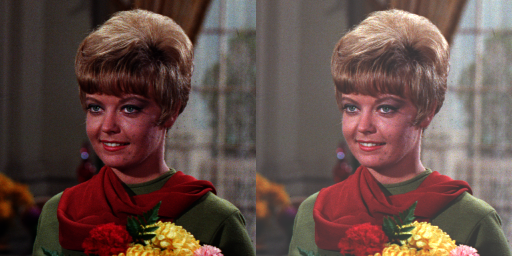

In [ ]:
print(' Mengubah tingkat kecerahan citra ')
print(' -------------------------------- ')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c]=np.clip(original[y,x,c] + brightness,0,255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

# Tugas Praktikum
1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

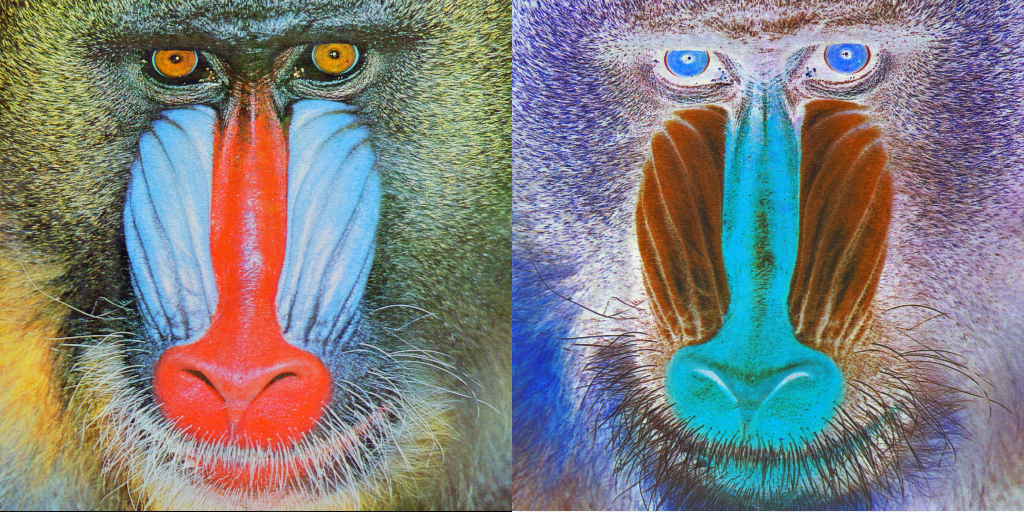

In [ ]:
org = cv.imread('/content/drive/MyDrive/pcvk/mandrill.tiff')
height, width, channels = org.shape
inverted_org = np.copy(org)

# Melakukan inversi pada setiap saluran warna
# inversi citra dengan rumus (255 - pixel)
for i in range(channels):
    inverted_org[:, :, i] = 255 - inverted_org[:, :, i]

finalframe2 = cv.hconcat((org, inverted_org))
cv2_imshow(finalframe2 )

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra 
 -------------------------------- 
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


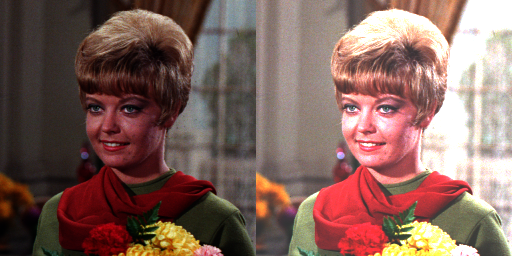

In [ ]:
print(' Mengubah tingkat kecerahan citra ')
print(' -------------------------------- ')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  kontras = float(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')
adjusted_img = cv.convertScaleAbs(original, alpha=kontras, beta=brightness)

final_frame = cv.hconcat((original,adjusted_img))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra 
 -------------------------------- 
Masukkan nilai kecerahan: 50


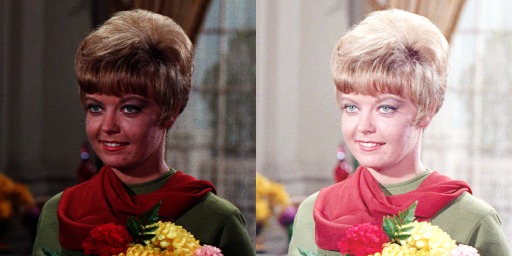

In [ ]:
print(' Mengubah tingkat kecerahan citra ')
print(' -------------------------------- ')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c]=np.clip(brightness* (np.log(1+original[y,x,c])),0,255 )

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut: <br>
a. Averaging

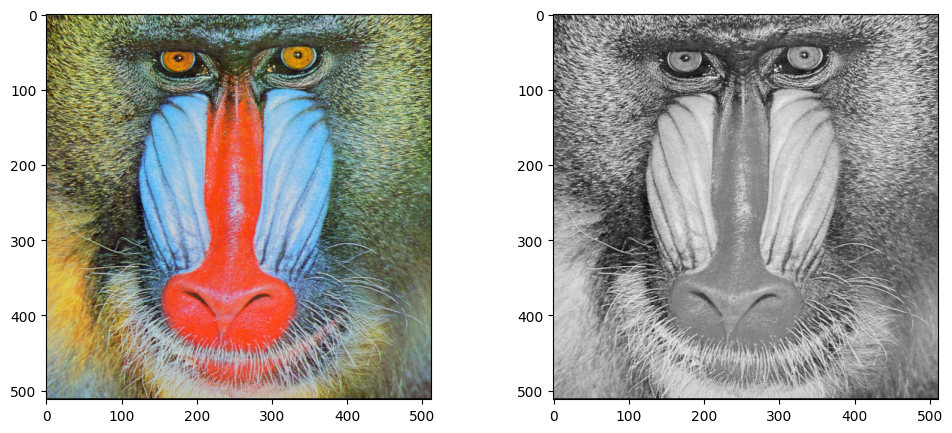

In [7]:
monyi = cv.imread('/content/drive/MyDrive/pcvk/mandrill.tiff')
grayscale_monyi = cv.cvtColor(monyi, cv.COLOR_BGR2GRAY)
fig, (original, gray_monyi) = plt.subplots(1, 2, figsize=(12, 5))

original.imshow(cv.cvtColor(monyi, cv.COLOR_BGR2RGB))
gray_monyi.imshow(grayscale_monyi, cmap='gray')

plt.show()

b. Lightness

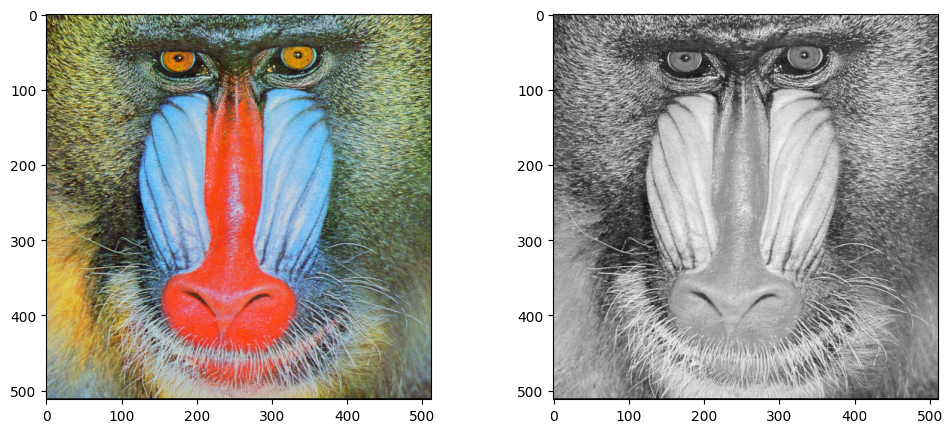

In [10]:
monyi = cv.imread('/content/drive/MyDrive/pcvk/mandrill.tiff')
light_monyi = cv.cvtColor(monyi, cv.COLOR_BGR2HLS)
l_channel = light_monyi[:,:,1]
fig, (original, l_monyi) = plt.subplots(1, 2, figsize=(12, 5))

original.imshow(cv.cvtColor(monyi, cv.COLOR_BGR2RGB))
l_monyi.imshow(l_channel, cmap='gray')

plt.show()

c. Luminance

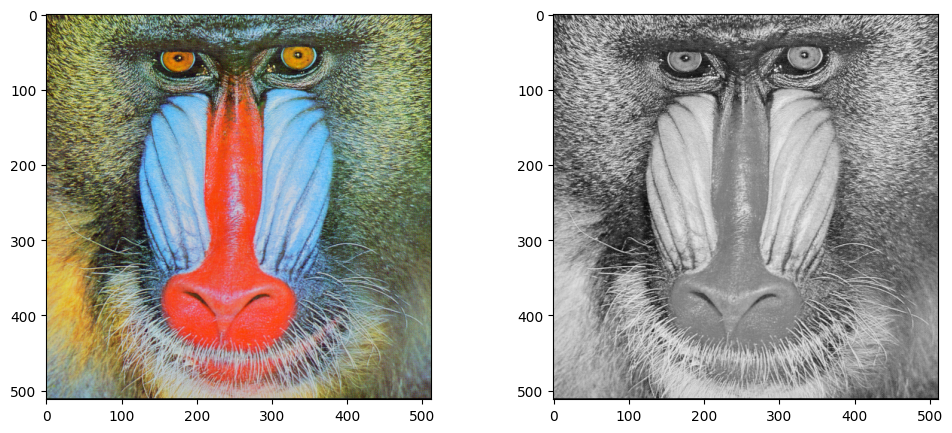

In [12]:
monyi = cv.imread('/content/drive/MyDrive/pcvk/mandrill.tiff')
yuv_monyi = cv.cvtColor(monyi, cv.COLOR_BGR2YUV)
y_channel = yuv_monyi[:,:,0]
fig, (original, y_monyi) = plt.subplots(1, 2, figsize=(12, 5))

original.imshow(cv.cvtColor(monyi, cv.COLOR_BGR2RGB))
y_monyi.imshow(y_channel, cmap='gray')

plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

(Warna yang ditammpilkan adalah warna kuning)

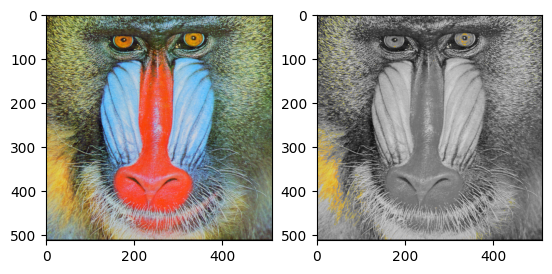

In [23]:
mnyt = cv.imread('/content/drive/MyDrive/pcvk/mandrill.tiff')
yel_monyi = cv.cvtColor(mnyt, cv.COLOR_BGR2RGB)

lower_yellow = np.array([150, 150, 0], dtype=np.uint8)
upper_yellow = np.array([255, 255, 100], dtype=np.uint8)
mask_yellow = cv.inRange(yel_monyi, lower_yellow, upper_yellow)

# invers mask kuning (kuning menjadi putih, latar belakang menjadi hitam)
mask_yellow_inv = cv.bitwise_not(mask_yellow)

# mengubah background menjadi gray
gray = cv.cvtColor(mnyt, cv.COLOR_BGR2GRAY)
mnyt = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# menggabungkan gambar kuning dan background
out = cv.bitwise_and(yel_monyi, yel_monyi, mask=mask_yellow)
out_bg = cv.bitwise_and(mnyt, mnyt, mask=mask_yellow_inv)
result = cv.add(out, out_bg)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(yel_monyi)
ax[1].imshow(result)
plt.show()